In [21]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict

In [41]:
ENDPOINTS = {
# Current Health Expenditure (CHE)
#    as a percentage of GDP
"CHE_GDP":"GHED_CHEGDP_SHA2011",
#    Per Capita in US$
"CHE_capita":"GHED_CHE_pc_US_SHA2011",
#    Per Capita in Purchasing Power Parity (PPP)
"CHE_PPP":"GHED_CHE_pc_PPP_SHA2011",
# Domestic General Government Health Expenditure (GGHE-D)
#    as a percentage of CHE
"GGHED_CHE":"GHED_GGHE-DCHE_SHA2011",
#    as a percentage of General Government Expenditure (GGE)
"GGHED_GGE":"GHED_GGHE-DGGE_SHA2011",
#    as a percentage of GDP
"GGHED_GDP":"GHED_GGHE-DGDP_SHA2011",
#    Per Capita in US$
"GGHED_capita":"GHED_GGHE-D_pc_US_SHA2011",
#    Per Capita in PPP
"GGHED_PPP":"GHED_GGHE-D_pc_PPP_SHA2011"}

ENDPOINTS = OrderedDict(ENDPOINTS.items())

In [42]:
def rid_unnecessary_cols(df, new_col_name):
    del df['GHO']
    del df['PUBLISHSTATE']
    del df['Comment']
    del df['HIGH RANGE']
    del df['LOW RANGE']
    del df['DISPLAY VALUE']
    df.rename(columns={'NUMERIC VALUE':new_col_name}, inplace=True)
    return df

In [43]:
for endpoint in ENDPOINTS:
    url = "https://apps.who.int/gho/athena/data/GHO/{}.html".format(ENDPOINTS[endpoint])
    if endpoint == "CHE_GDP":
        df = pd.read_html(url)[0]
        df = rid_unnecessary_cols(df,endpoint)
        df.dropna(subset=["COUNTRY"],inplace=True)
    else:
        df_new = pd.read_html(url)[0]
        df_new = rid_unnecessary_cols(df_new,endpoint)
        del df_new['WORLDBANKINCOMEGROUP']
        df_new.dropna(subset=["COUNTRY"],inplace=True)
        df = df.merge(df_new,on=['YEAR','REGION','COUNTRY'])
        
print(df.columns)
print(len(df))

Index(['YEAR', 'REGION', 'WORLDBANKINCOMEGROUP', 'COUNTRY', 'CHE_GDP',
       'CHE_capita', 'CHE_PPP', 'GGHED_CHE', 'GGHED_GGE', 'GGHED_GDP',
       'GGHED_capita', 'GGHED_PPP'],
      dtype='object')
3364


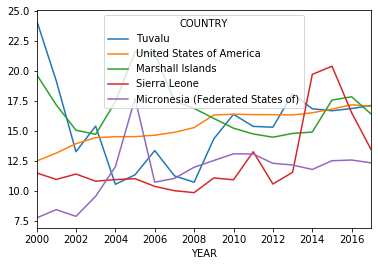

In [59]:
fig,ax = plt.subplots(figsize=(8,8))
df.groupby(['COUNTRY','YEAR']).sum()['CHE_GDP'].unstack().nlargest(5,2017).T

In [60]:
df.COUNTRY.unique()

array(['Afghanistan', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', "CÃ´te d'Ivoire",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
   

In [67]:
from IPython.paths import get_ipython_dir
import os
for file,dirname,dirpath in os.walk(get_ipython_dir()):
    print(file)

C:\Users\ryana\.ipython
C:\Users\ryana\.ipython\extensions
C:\Users\ryana\.ipython\nbextensions
C:\Users\ryana\.ipython\profile_default
C:\Users\ryana\.ipython\profile_default\db
C:\Users\ryana\.ipython\profile_default\log
C:\Users\ryana\.ipython\profile_default\pid
C:\Users\ryana\.ipython\profile_default\security
C:\Users\ryana\.ipython\profile_default\startup
